In [1]:
import numpy as np
import pandas as pd 

In [2]:
from sklearn.datasets import load_iris

In [3]:
data=load_iris()

In [4]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
feature=np.array(data.data)
feature[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [6]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
target=np.array(data.target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(feature,target,test_size=0.2,random_state=42,stratify=target)

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, optimizers, layers
from tensorflow.keras.layers import Dense

In [10]:
def build_iris_model(hidden_sizes=(32,12), lr=0.001):
    m = models.Sequential()
    m.add(layers.Input(shape=(4,)))
    for h in hidden_sizes:
        m.add(layers.Dense(h, activation='relu'))
    m.add(layers.Dense(3, activation='softmax'))
    m.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return m

In [11]:
model =build_iris_model(hidden_sizes=(64,32), lr=0.001)

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,499 (9.76 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
# Train
history = model.fit(xtrain, ytrain, validation_split=0.2, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5625 - loss: 0.9158 - val_accuracy: 0.5833 - val_loss: 0.8226
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6875 - loss: 0.7509 - val_accuracy: 0.6250 - val_loss: 0.6910
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6875 - loss: 0.6378 - val_accuracy: 0.6250 - val_loss: 0.6005
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8333 - loss: 0.5622 - val_accuracy: 0.8333 - val_loss: 0.5275
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7812 - loss: 0.5025 - val_accuracy: 0.9583 - val_loss: 0.4740
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8438 - loss: 0.4608 - val_accuracy: 0.9583 - val_loss: 0.4440
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9375 - loss: 0.4307 - val_accuracy: 1.0000 - val_loss: 0.3942
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8646 - loss: 0.3948 - val_accuracy: 1.0000 - val_loss

In [15]:
y_pred = model.predict(xtest)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [16]:
y_pred

array([[9.9769175e-01, 2.3008923e-03, 7.3650281e-06],
       [1.0633112e-03, 3.2852978e-01, 6.7040694e-01],
       [7.4363276e-03, 9.7882038e-01, 1.3743326e-02],
       [6.1938590e-03, 9.8070979e-01, 1.3096315e-02],
       [9.9850959e-01, 1.4859039e-03, 4.5740667e-06],
       [1.2265240e-03, 9.3115109e-01, 6.7622364e-02],
       [9.9968660e-01, 3.1274740e-04, 7.2345432e-07],
       [9.9816966e-01, 1.8284478e-03, 1.9564020e-06],
       [4.1401823e-04, 1.3278925e-01, 8.6679673e-01],
       [2.4957783e-03, 6.2643951e-01, 3.7106466e-01],
       [3.2146629e-05, 2.4814213e-02, 9.7515363e-01],
       [5.2500598e-04, 1.8461418e-01, 8.1486076e-01],
       [2.5964015e-05, 4.6400223e-03, 9.9533397e-01],
       [9.2953519e-04, 9.8094261e-01, 1.8127896e-02],
       [9.9879372e-01, 1.2043265e-03, 1.9501940e-06],
       [9.9889416e-01, 1.1040791e-03, 1.8323076e-06],
       [9.9990511e-01, 9.4728704e-05, 6.1153543e-08],
       [1.7397706e-03, 9.8244250e-01, 1.5817689e-02],
       [1.3395244e-03, 8.643

In [17]:
y_pred = y_pred.argmax(axis=-1)

In [18]:
y_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 1, 1, 0, 2, 0])

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred)

1.0

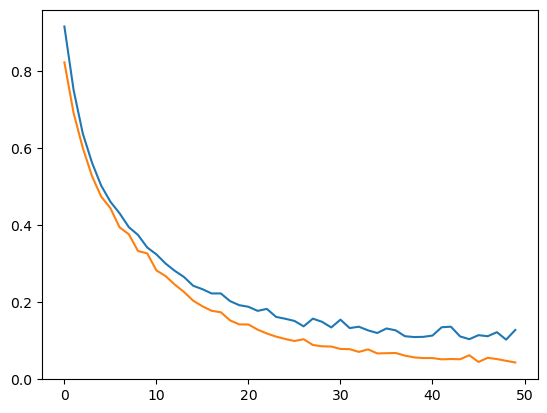

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

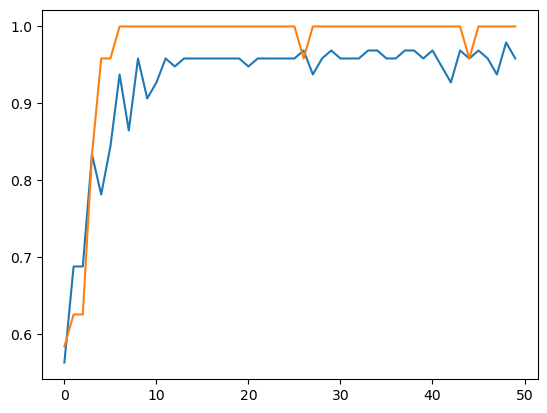

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])